# Linear Regression

Perhaps there is no other task more common in curve fitting than optimizing the parameters of a linear model using least squares. The linear model is one simplest (of course after the constant model) models to fit our data and usually represents our first choice when we don't know any better.

The linear model is described by:

$$ y = a + bx $$

where:

$y$ is the dependent variable. The output of our model.

$a$ is the intercept at the ordinate. Position on the x-axis that our model intersects the y-axis. This value can be positive or negative.

$b$ is the slope of our model. It represents the rate of change of the curve. This value can be positive or negative.

$x$ is the independent variable. The input of our model.


In this exercise we will look at simple examples of linear dependency for some weather variables. The weather variables are just an excuse to use real observations and avoid relying on synthetic data. The dataset was obtained from the [Kansas Meosnet station near Gypsum, KS](https://www.google.com/maps/@38.725139,-97.4441767,42m/data=!3m1!1e3). It's important to highlight that the dataset contains atmopsheric and soil variables (soil temperature and soil moisture at multiple depths).

Soil temperature is recorded by a custom made soil temperature sensor and by the Campbel Scientific 655 (CS655) soil water reflectometer sensor, which records both soil water and soil temperature.


In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Load some weather data
df = pd.read_csv('../datasets/gypsum_ks_daily_2018.csv')


In [3]:
# Explore headers
df.head(5)


,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP10MAX,SOILTMP10MIN,SOILTMP5AVG655,SOILTMP10AVG655,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM
0,1/1/18 0:00,Gypsum,99.44,100.03,98.73,104.44,-15.15,-19.56,-11.00,-15.31,...,-1.18,-2.45,-1.33,-1.14,0.74,3.50,0.1377,0.1167,0.2665,0.2203
1,1/2/18 0:00,Gypsum,99.79,100.14,99.40,104.88,-16.48,-22.10,-10.40,-16.38,...,-1.56,-3.46,-2.10,-1.82,0.28,3.13,0.1234,0.1021,0.2642,0.2196
2,1/3/18 0:00,Gypsum,98.87,99.52,97.94,103.81,-11.03,-20.64,-2.71,-10.66,...,-1.49,-3.61,-2.21,-1.93,-0.08,2.76,0.1206,0.0965,0.2353,0.2189
3,1/4/18 0:00,Gypsum,98.22,98.54,97.90,102.99,-5.83,-11.79,0.24,-5.01,...,-0.98,-2.67,-1.60,-1.46,-0.21,2.45,0.1235,0.0973,0.2094,0.2182
4,1/5/18 0:00,Gypsum,98.10,98.42,97.75,102.88,-4.73,-14.22,5.36,-4.23,...,-0.72,-2.81,-1.54,-1.38,-0.25,2.25,0.1249,0.0976,0.2047,0.2180


In [4]:
# Explore last few rows
df.tail(5)


,TIMESTAMP,STATION,PRESSUREAVG,PRESSUREMAX,PRESSUREMIN,SLPAVG,TEMP2MAVG,TEMP2MMIN,TEMP2MMAX,TEMP10MAVG,...,SOILTMP10MAX,SOILTMP10MIN,SOILTMP5AVG655,SOILTMP10AVG655,SOILTMP20AVG655,SOILTMP50AVG655,VWC5CM,VWC10CM,VWC20CM,VWC50CM
360,12/27/18 0:00,Gypsum,96.71,97.59,95.54,101.17,9.22,5.78,12.36,9.18,...,7.24,3.58,5.15,4.97,4.60,5.18,0.3561,0.3666,0.3534,0.2972
361,12/28/18 0:00,Gypsum,95.77,96.97,95.02,100.21,2.60,-4.05,12.36,2.44,...,7.45,3.46,6.26,6.26,6.24,5.77,0.3786,0.3810,0.3856,0.3445
362,12/29/18 0:00,Gypsum,97.72,98.44,96.89,102.44,-4.92,-8.76,-2.09,-5.07,...,3.46,1.63,2.35,2.72,4.30,5.93,0.3588,0.3645,0.3699,0.3204
363,12/30/18 0:00,Gypsum,98.16,98.55,97.54,102.95,-6.38,-9.77,-0.55,-6.49,...,1.63,0.97,1.22,1.58,2.96,5.26,0.3477,0.3539,0.3612,0.3131
364,12/31/18 0:00,Gypsum,96.75,97.64,96.08,101.38,0.28,-5.52,8.13,0.21,...,0.98,0.71,0.82,1.15,2.32,4.67,0.3373,0.3455,0.3557,0.3089


In [5]:
# Examine data to see whether we have NaN values or not
df.isna().sum()


TIMESTAMP          0
STATION            0
PRESSUREAVG        0
PRESSUREMAX        0
PRESSUREMIN        0
SLPAVG             0
TEMP2MAVG          1
TEMP2MMIN          1
TEMP2MMAX          2
TEMP10MAVG         0
TEMP10MMIN         1
TEMP10MMAX         2
RELHUM2MAVG        0
RELHUM2MMAX        0
RELHUM2MMIN        1
RELHUM10MAVG       0
RELHUM10MMAX       0
RELHUM10MMIN       1
VPDEFAVG           1
PRECIP             0
SRAVG              0
SR                 0
WSPD2MAVG          0
WSPD2MMAX          0
WSPD10MAVG         0
WSPD10MMAX         0
WDIR2M             0
WDIR2MSTD          0
WDIR10M            0
WDIR10MSTD         0
SOILTMP5AVG        0
SOILTMP5MAX        0
SOILTMP5MIN        0
SOILTMP10AVG       0
SOILTMP10MAX       0
SOILTMP10MIN       0
SOILTMP5AVG655     0
SOILTMP10AVG655    0
SOILTMP20AVG655    0
SOILTMP50AVG655    0
VWC5CM             0
VWC10CM            0
VWC20CM            0
VWC50CM            0
dtype: int64

When dealing with real data the presence of missing values is typically the rule than the exception. In our case, most variables have no missing values, but of them do. In this case we can take advantage of some built-in methods to fill these values. An alternative is to remove these rows using the `dropna()` method. Note that missing values represented with a different placeholder (e.g. -99, -9999) will not be detected as NaN. We need to manually fill in these with NaNs using the `fillna()` method or using a boolean index.

>Booleans represent zeros (`False`) and ones (`True`), so two bits. We can actually add them up using the Pandas library using the `sum()` method to summarize the total number of missing values represented as NaN in our dataset.


In [6]:
# Fill missing values
df = df.fillna(method='backfill')


For a single column we can simply do `data['TEMP10MAVG'].fillna(method='backfill')`

## Air temperature vs Soil temperature

Together with soil moisture, soil temperature is and important variabl dictating the planting date, particularly of summer crops such as corn. On average crops are seeded at about 5 cm (2 inches or 0.05 meter) depth, and while there is an increasing number of networks monitoring soil temperature, air temperature is by far a more common variable even from backyard weather stations.

So a valid question would be to think whether we can estimate soil temperature at the planting depth using readily available air temperature observations. To find the answer we can use data from stations monitoring both variables to give as an idea of the relationship. We will fit a linear model and see whether the model provides adequate predictive power for common practical applications.


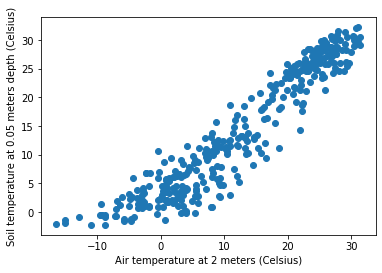

In [7]:
# Compare air temperature at 2 and 10 meters.
plt.scatter(df["TEMP2MAVG"], df["SOILTMP5AVG655"])
plt.xlabel('Air temperature at 2 meters (Celsius)')
plt.ylabel('Soil temperature at 0.05 meters depth (Celsius)')
plt.show()


In [8]:
# Fit linear model using linregress
fit_info = stats.linregress(df["TEMP2MAVG"], df["SOILTMP5AVG655"])

# Display individual parameters
print('slope:',fit_info.slope)
print('intercept:',fit_info.intercept)
print('r:',fit_info.rvalue)
print('r-squared:',fit_info.rvalue**2)
print('p-value:',fit_info.pvalue)



slope: 0.8667839222050925
intercept: 3.503863329087279
r: 0.9480160047071207
r-squared: 0.8987343451808514
p-value: 1.3681157460919794e-182


In [9]:
# Predict soil temperature at 0.05 m based on air temperature at 2 m 
y_pred = fit_info.intercept + fit_info.slope*df["TEMP2MAVG"]


Alternatively you can call the `linregress()` method with multiple output arguments: `slope, intercept, r_val, p_val, std_err = stats.linregress(df["TEMP2MAVG"], df["SOILTMP5AVG655"])`. In this case all the outputs will be assigned their own variable name. There is no rule about which method you should use. If you are dealing with multiple models and fitted parameters, it might be a good idea to encapsulate the slopes, intercepts, and goodness of fit into a single variable to simplify variable names and reduce code complexity.


In [ ]:
# Figure of data and linear model
plt.scatter(df["TEMP2MAVG"], df["SOILTMP5AVG655"], marker='o', color='b', alpha=0.5, label='obs')
plt.plot(df["TEMP2MAVG"], y_pred, '-k', label='pred')
plt.legend()
plt.xlabel('Air temperature at 2 meters (Celsius)')
plt.ylabel('Soil temperature at 0.05 meters depth (Celsius)')
plt.show()


## Examine residuals

1.5184200928572005e-15


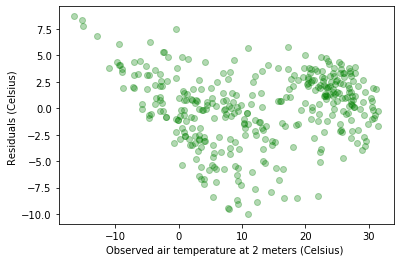

In [11]:
# Compute residuals
residuals = df["SOILTMP5AVG655"] - y_pred # Observed - predicted

# Do residuals have a mean of zero?
print(stats.tmean(residuals))

# Always plot residuals
plt.figure()
plt.scatter(df["TEMP2MAVG"], residuals, marker='o', color='g', alpha=0.3)
plt.xlabel("Observed air temperature at 2 meters (Celsius) ")
plt.ylabel("Residuals (Celsius) ")
plt.show()


## Compute accuracy

We will take advantage of the built-in median absolute errormetric from the `scipy.stats` module. The median absolute error represents the typical error and is more robust agains outliers than the mean absolute error and the root mean squared error.


In [12]:
# Median absolute error. 
MAE = stats.median_absolute_deviation(residuals)
print("MAE=", round(MAE,2), 'Celsius')


MAE= 3.19 Celsius


## Remarks

- There is a positive relationship between air and soil temperature, as expected. While it seems obvious, note that this may not be true for deeper soil temperatures. It takes time for heat to move to deeper layers and there can be strong delays at greater depths and a linear model may no longer be valid.

- The coefficient of linear correlation (R) between air temperature and soil temperature at 5 cm depth was strong (R = 0.95).

- The low p-value (P<0.001) shows that the regression is statistically significant.

- Despite the overall high linear correlation, the relationship is not that strong at temperatures below freezing. From the plot of residuals we can see up to 10 degrees error. To better capture this pattern we need a non-linear model. Since our scope is in summer crops, then this probably not that important.

- Using data for 2018, the linear model can predict soil temperature at 5 cm depth from air temperature obsrvations at 2 m height with an accuracy of about 3 Celsius across the range of -20 to 30 degrees Celsius.


## Additional exercises

- Can you find other linear relationships in the dataset? Hint: Daily average air temperature (TEMP2MAVG) vs average daily atmospheric pressure (PRESSUREAVG).

- What is the sign of the slope? What does it mean?


In [ ]:
import seaborn as sns

df_reduced = df[:,2:6]

# with regression
sns.pairplot(df_reduced, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df_reduced, kind="scatter")
plot.show()
